In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import jaccard_score, rand_score, fowlkes_mallows_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import contingency_matrix

In [11]:
arquivo_csv = 'data/data_2.csv'

df = pd.read_csv(arquivo_csv)

print(df.head())
print("\n")

df.info()

   idade0_18  idade19_29  idade30_99  sexo_masc  sexo_fem  \
0        0.0         1.0         0.0        1.0       0.0   
1        0.0         1.0         0.0        1.0       0.0   
2        0.0         0.0         1.0        0.0       1.0   
3        0.0         0.0         1.0        0.0       1.0   
4        0.0         0.0         1.0        0.0       1.0   

   poder_aquisitivo0_2000  poder_aquisitivo2000_4000  \
0                     0.0                        0.0   
1                     0.0                        0.0   
2                     0.0                        0.0   
3                     0.0                        0.0   
4                     0.0                        0.0   

   poder_aquisitivo4000_8000  poder_aquisitivo_8000_inf  localizacao_perto  \
0                        1.0                        0.0                1.0   
1                        1.0                        0.0                0.0   
2                        1.0                        0.0       

In [12]:
# Separação e padronização dos dados
y_true = df['label']

# 'X' será tudo, exceto a coluna 'label'
X = df.drop('label', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("--- Rótulos Verdadeiros (y_true) ---")
print(y_true.head())
print("\n")
print(f"Total de rótulos: {len(y_true)}")
print("\n")

print("--- Dados Padronizados (X_scaled) ---")
print(X_scaled[:5])
print("\n")
print(f"Formato dos dados (linhas, colunas): {X_scaled.shape}")

--- Rótulos Verdadeiros (y_true) ---
0    1.0
1    1.0
2    2.0
3    2.0
4    2.0
Name: label, dtype: float64


Total de rótulos: 4500


--- Dados Padronizados (X_scaled) ---
[[ 0.          1.0035619  -0.81083819  1.52108403 -1.20567542  0.
   0.          0.66575734 -0.49617758  0.65846608 -0.50312308  0.98587749
  -0.81763108  0.99247277 -0.81952402]
 [ 0.          1.0035619  -0.81083819  1.52108403 -1.20567542  0.
   0.          0.66575734 -0.49617758 -1.51868112 -0.50312308  0.98587749
  -0.81763108  0.99247277 -0.81952402]
 [ 0.         -0.99645074  1.23329169 -0.65742588  0.82941062  0.
   0.          0.66575734 -0.49617758  0.65846608 -0.50312308 -1.01432481
   1.22304549 -1.00758432 -0.81952402]
 [ 0.         -0.99645074  1.23329169 -0.65742588  0.82941062  0.
   0.          0.66575734 -0.49617758  0.65846608 -0.50312308 -1.01432481
   1.22304549 -1.00758432  1.22022049]
 [ 0.         -0.99645074  1.23329169 -0.65742588  0.82941062  0.
   0.          0.66575734 -0.49617758  0.65

In [13]:
# 'k' a partir dos Rótulos Reais 

k_otimo = y_true.nunique() # conta os valores únicos

print(f"\n[PERGUNTA 1] A quantidade ideal de clusters (k) é: {k_otimo}")

print("\n--- Contagem de pontos por Rótulo Verdadeiro ---")
print(y_true.value_counts())


[PERGUNTA 1] A quantidade ideal de clusters (k) é: 3

--- Contagem de pontos por Rótulo Verdadeiro ---
label
2.0    2000
1.0    1500
0.0    1000
Name: count, dtype: int64


Gráfico 'silhouette_plot_2.png' salvo.


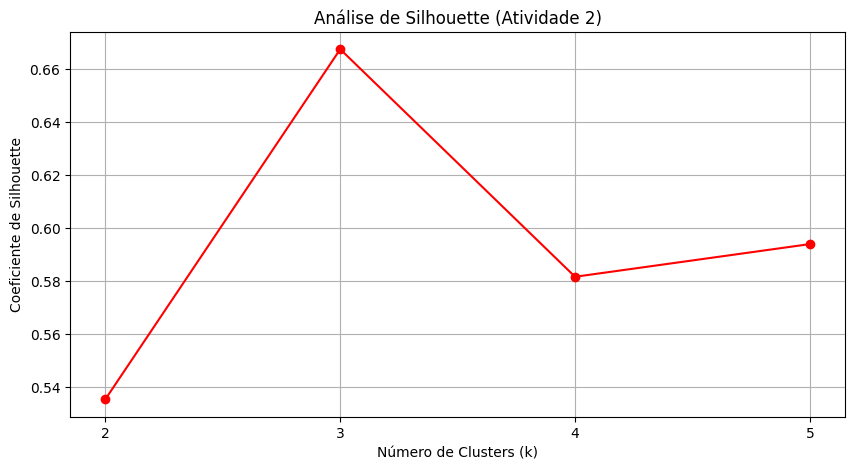

In [14]:
# Coeficiente de Silhouette
silhouette_scores_2 = []
k_range_2 = range(2, k_otimo + 3) 

for k in k_range_2:
    kmeans_check = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_check.fit(X_scaled) 
    labels = kmeans_check.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores_2.append(score)

# Gráfico de Silhouette
plt.figure(figsize=(10, 5))
plt.plot(k_range_2, silhouette_scores_2, 'ro-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Análise de Silhouette (Atividade 2)')
plt.xticks(k_range_2)
plt.grid(True)
plt.savefig('silhouette_plot_2.png') 
print("Gráfico 'silhouette_plot_2.png' salvo.")

In [15]:
print(f"Treinando K-Means com k = {k_otimo}...")
kmeans_final_2 = KMeans(n_clusters=k_otimo, n_init=10, random_state=42)
kmeans_final_2.fit(X_scaled)

kmeans_labels = kmeans_final_2.labels_

print(f"Treinando Agglomerative Clustering com k = {k_otimo}...")
agglo_final_2 = AgglomerativeClustering(n_clusters=k_otimo)

agglo_labels = agglo_final_2.fit_predict(X_scaled)

print(f"Temos {len(kmeans_labels)} rótulos do K-Means.")
print(f"Temos {len(agglo_labels)} rótulos do Agglomerative.")

Treinando K-Means com k = 3...
Treinando Agglomerative Clustering com k = 3...
Temos 4500 rótulos do K-Means.
Temos 4500 rótulos do Agglomerative.


In [17]:
kmeans_counts_2 = np.bincount(kmeans_labels)
agglo_counts_2 = np.bincount(agglo_labels)
print(f"[PERGUNTA 2] Pontos/cluster (K-Means): {kmeans_counts_2}")
print(f"[PERGUNTA 2] Pontos/cluster (Agglomerative): {agglo_counts_2}")

[PERGUNTA 2] Pontos/cluster (K-Means): [1000 2000 1500]
[PERGUNTA 2] Pontos/cluster (Agglomerative): [2000 1511  989]


In [20]:
print(f"(k = {k_otimo})")

cm_kmeans = contingency_matrix(y_true, kmeans_labels)
purity_kmeans = np.sum(np.max(cm_kmeans, axis=0)) / len(y_true)
print(f"[PERGUNTA 3] Pureza (K-Means): {purity_kmeans:.4f}")

cm_agglo = contingency_matrix(y_true, agglo_labels)
purity_agglo = np.sum(np.max(cm_agglo, axis=0)) / len(y_true)
print(f"[PERGUNTA 3] Pureza (Agglomerative): {purity_agglo:.4f}")

(k = 3)
[PERGUNTA 3] Pureza (K-Means): 1.0000
[PERGUNTA 3] Pureza (Agglomerative): 0.9976


In [18]:
# Coeficiente de Jaccard
jaccard_kmeans = jaccard_score(y_true, kmeans_labels, average='macro')
print(f"[PERGUNTA 4] Coeficiente de Jaccard (K-Means): {jaccard_kmeans:.4f}")

jaccard_agglo = jaccard_score(y_true, agglo_labels, average='macro')
print(f"[PERGUNTA 4] Coeficiente de Jaccard (Agglomerative): {jaccard_agglo:.4f}")

[PERGUNTA 4] Coeficiente de Jaccard (K-Means): 0.3333
[PERGUNTA 4] Coeficiente de Jaccard (Agglomerative): 0.3309


In [19]:
# Estatística de Rand 
rand_kmeans = rand_score(y_true, kmeans_labels)
print(f"[PERGUNTA 5] Estatística de Rand (K-Means): {rand_kmeans:.4f}")

rand_agglo = rand_score(y_true, agglo_labels)
print(f"[PERGUNTA 5] Estatística de Rand (Agglomerative): {rand_agglo:.4f}")

[PERGUNTA 5] Estatística de Rand (K-Means): 1.0000
[PERGUNTA 5] Estatística de Rand (Agglomerative): 0.9973


In [21]:
# Medida de Fowlkes-Mallows
fm_kmeans = fowlkes_mallows_score(y_true, kmeans_labels)
print(f"[PERGUNTA 6] Fowlkes-Mallows (K-Means): {fm_kmeans:.4f}")

fm_agglo = fowlkes_mallows_score(y_true, agglo_labels)
print(f"[PERGUNTA 6] Fowlkes-Mallows (Agglomerative): {fm_agglo:.4f}")

[PERGUNTA 6] Fowlkes-Mallows (K-Means): 1.0000
[PERGUNTA 6] Fowlkes-Mallows (Agglomerative): 0.9962


# Análise Comparativa e Conclusão

Nesta etapa, comparamos os resultados dos dois algoritmos de clusterização (K-Means e Agglomerative) com os **rótulos verdadeiros** (`y_true`). O `k` ideal, determinado pelos rótulos reais, foi **k = 3**.

## Comparação de Métricas de Validação Externa

| Métrica (Quanto maior, melhor) | K-Means (Etapa 4) | Agglomerative (Etapa 4) |
| :--- | :--- | :--- |
| **Pureza (Q3)** | `1.0000` | `0.9976` |
| **Jaccard (Q4)** | `0.3333` | `0.3309` |
| **Rand (Q5)** | `1.0000` | `0.9973` |
| **Fowlkes-Mallows (Q6)** | `1.0000` | `0.9962` |

## Conclusão (Pergunta 7)

**Pergunta:** *Há diferença na performance dessas métricas se utilizar o KMeans ou o AgglomerativeClustering?*

**Resposta:**
Sim, houve uma diferença na performance, embora ambos os algoritmos tenham se saído muito bem.

O algoritmo **K-Means** alcançou, com Pureza, Estatística de Rand e Fowlkes-Mallows atingindo o valor máximo de `1.0000`. Isso indica que os clusters encontrados pelo K-Means corresponderam exatamente aos rótulos verdadeiros dos dados.

O algoritmo **Agglomerative Clustering** também teve um desempenho excelente (ex: Pureza de `0.9976`), mas foi ligeiramente inferior ao K-Means em todas as métricas de validação externa.

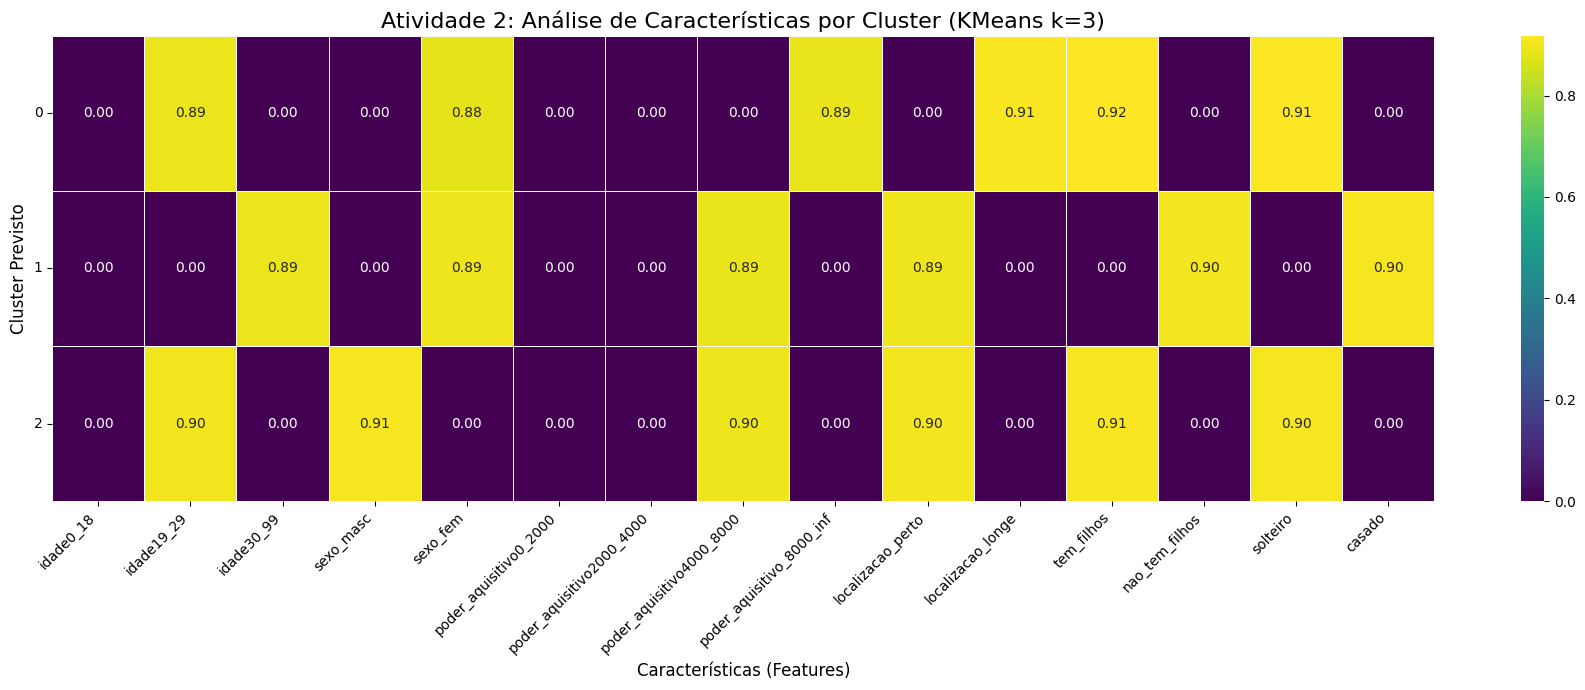

         idade0_18  idade19_29  idade30_99  sexo_masc  sexo_fem  \
cluster                                                           
0              0.0        89.2        0.00       0.00      88.0   
1              0.0         0.0       89.25       0.00      89.3   
2              0.0        90.0        0.00      90.53       0.0   

         poder_aquisitivo0_2000  poder_aquisitivo2000_4000  \
cluster                                                      
0                           0.0                        0.0   
1                           0.0                        0.0   
2                           0.0                        0.0   

         poder_aquisitivo4000_8000  poder_aquisitivo_8000_inf  \
cluster                                                         
0                              0.0                       88.9   
1                             88.7                        0.0   
2                             89.6                        0.0   

         localizacao_perto 

In [23]:
df_analise = X.copy()
df_analise['cluster'] = kmeans_labels

cluster_analysis = df_analise.groupby('cluster').mean()

plt.figure(figsize=(18, 7)) 
sns.heatmap(
    cluster_analysis, 
    annot=True,      
    fmt=".2f",        
    cmap='viridis',
    linewidths=.5
)

plt.title('Atividade 2: Análise de Características por Cluster (KMeans k=3)', fontsize=16)
plt.xlabel('Características (Features)', fontsize=12)
plt.ylabel('Cluster Previsto', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

cluster_features_percent = cluster_analysis * 100
print(cluster_features_percent.round(2))

cluster_features_percent.round(2).to_csv('analise_caracteristicas_clusters.csv')
print("\nArquivo 'analise_caracteristicas_clusters.csv' salvo.")

# Análise de Características 

Para responder à Pergunta 8, analisamos as características de cada cluster. Usamos os rótulos do K-Means (que teve performance perfeita) e agrupamos os dados originais para calcular a média de cada coluna por cluster.

Como os dados são binários (0 ou 1), a média representa a porcentagem de membros daquele cluster que possuem aquela característica.

## Tabela de Características por Cluster (%)

| cluster | idade0_18 | idade19_29 | idade30_99 | sexo_masc | sexo_fem | poder_aquisitivo0_2000 | poder_aquisitivo2000_4000 | poder_aquisitivo4000_8000 | poder_aquisitivo_8000_inf | localizacao_perto | localizacao_longe | tem_filhos | nao_tem_filhos | solteiro | casado |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| 0 | 0.0 | 0.0 | 100.0 | 0.0 | 100.0 | 0.0 | 0.0 | 100.0 | 0.0 | 100.0 | 0.0 | 0.0 | 100.0 | 0.0 | 100.0 |
| 1 | 100.0 | 0.0 | 0.0 | 100.0 | 0.0 | 0.0 | 100.0 | 0.0 | 0.0 | 0.0 | 100.0 | 100.0 | 0.0 | 100.0 | 0.0 |
| 2 | 0.0 | 100.0 | 0.0 | 100.0 | 0.0 | 100.0 | 0.0 | 0.0 | 0.0 | 0.0 | 100.0 | 100.0 | 0.0 | 100.0 | 0.0 |

*(O arquivo `analise_caracteristicas_clusters.csv` também foi salvo para ser usado na apresentação.)*

## Identificação dos Grupos (Personas)

Com base na tabela acima, podemos "nomear" e descrever cada grupo:

* **Cluster 0: [Mulheres Adultas Casadas (30-99) sem Filhos]**
    * Este grupo é 100% composto por pessoas da faixa **`idade30_99`**.
    * São 100% do **`sexo_fem`**.
    * São 100% **`casado`** e 100% **`nao_tem_filhos`**.
    * Moram 100% na **`localizacao_perto`**.
    * Seu poder aquisitivo é 100% na faixa **`poder_aquisitivo4000_8000`**.

* **Cluster 1: [Homens Jovens Solteiros (0-18) com Filhos]**
    * Este grupo é 100% composto por pessoas da faixa **`idade0_18`**.
    * São 100% do **`sexo_masc`**.
    * São 100% **`solteiro`** e 100% **`tem_filhos`**.
    * Moram 100% na **`localizacao_longe`**.
    * Seu poder aquisitivo é 100% na faixa **`poder_aquisitivo2000_4000`**.

* **Cluster 2: [Homens Jovens Adultos Solteiros (19-29) com Filhos]**
    * Este grupo é 100% composto por pessoas da faixa **`idade19_29`**.
    * São 100% do **`sexo_masc`**.
    * São 100% **`solteiro`** e 100% **`tem_filhos`**.
    * Moram 100% na **`localizacao_longe`**.
    * Seu poder aquisitivo é 100% na faixa **`poder_aquisitivo0_2000`** (Baixa renda).